In [0]:
!pip install python-Levenshtein


  Using cached https://files.pythonhosted.org/packages/42/a9/d1785c85ebf9b7dfacd08938dd028209c34a0ea3b1bcdb895208bd40a67d/python-Levenshtein-0.12.0.tar.gz
  Running setup.py bdist_wheel for python-Levenshtein ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import Levenshtein as L

In [0]:
from google.colab import files
Andre = files.upload()


Saving deid-Andre_Holder.py to deid-Andre_Holder (1).py


In [0]:
from google.colab import files
ChenLin = files.upload()

Saving deid-ChenLin.py to deid-ChenLin (2).py


In [0]:
from google.colab import files
FeverDreams = files.upload()

Saving deid_phone.py to deid_phone.py


In [0]:
import pandas as pd
import os
import re
file_path="de-id_codes"
Name_of_Codes_list=[]
writer=['Andre','ChenLin','FeverDreams']
#,'Itoshikihiro','Mahmoud','Nasim','Parisa','Shaojun'
Python_Codes={'Andre':Andre.values(),'ChenLin':ChenLin.values(),'FeverDreams':FeverDreams.values()}

#print(Python_Codes)
print(type(Python_Codes['Andre']))


<class 'dict_values'>


In [0]:
import numpy
#imilarities=numpy.array([[0,0,0],[0,0,0],[0,0,0]])
Similarities_Jaro= np.zeros((len(Python_Codes),len(Python_Codes)), dtype=np.float32)
Similarities_distance= np.zeros((len(Python_Codes),len(Python_Codes)), dtype=np.float32)
Similarities_jaro_winkler= np.zeros((len(Python_Codes),len(Python_Codes)), dtype=np.float32)
Similarities_ratio= np.zeros((len(Python_Codes),len(Python_Codes)), dtype=np.float32)


i=-1;j=-1
for key1 in Python_Codes.keys():
  i+=1
  j=-1
  for key2 in Python_Codes.keys():
    j+=1
    str1=str(list(Python_Codes[key1]))
    str2=str(list(Python_Codes[key2]))
    #rint(type(str2))
    #rint(L.jaro(str1,str2))
    Similarities_Jaro[i][j]=L.jaro(str1,str2)# Jaro string similarity metric
    Similarities_distance[i][j]=L.distance(str1,str2)# Absolute Levenshtein distance
    Similarities_jaro_winkler[i][j]=L.jaro_winkler(str1,str2)# Jaro-Winkler string similarity
    Similarities_ratio[i][j]=L.ratio(str1,str2)# Similarity of two strings



**Jaro Similarity Metric Results:**

[[1.         0.5638947  0.78184444]
 [0.5638947  1.         0.5902005 ]
 [0.78184444 0.5902005  1.        ]]


Text(0.5,1,'Jaro Metric')

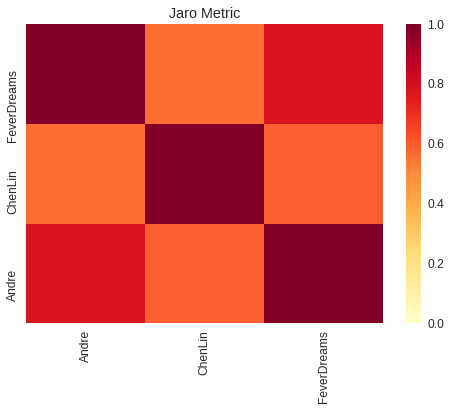

In [0]:
print(Similarities_Jaro)    
sns.set(font_scale=1.2)
g = sns.heatmap(
    Similarities_Jaro,
    vmin=0,
    vmax=1,
    cmap="YlOrRd")

g.set_xticklabels(writer, rotation=90)
g.set_yticklabels(writer, rotation=90)
g.set_title("Jaro Metric")

** Absolute Levenshtein distance**

[[    0. 16293.  1595.]
 [16293.     0. 15776.]
 [ 1595. 15776.     0.]]


Text(0.5,1,'Levenshtein Distance Metric')

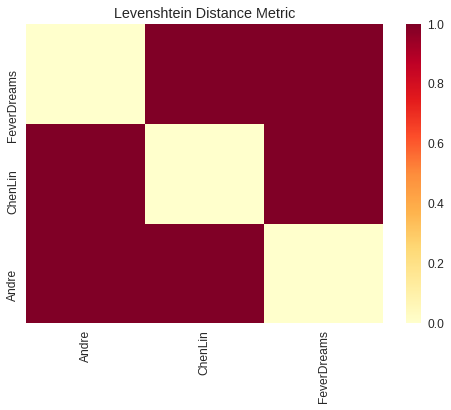

In [0]:
print(Similarities_distance)    
sns.set(font_scale=1.2)
g = sns.heatmap(
    Similarities_distance,
    vmin=0,
    vmax=1,
    cmap="YlOrRd")

g.set_xticklabels(writer, rotation=90)
g.set_yticklabels(writer, rotation=90)
g.set_title("Levenshtein Distance Metric")

**Jaro-Winkler string similarity**

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Text(0.5,1,'Jaro Wrinkler Metric')

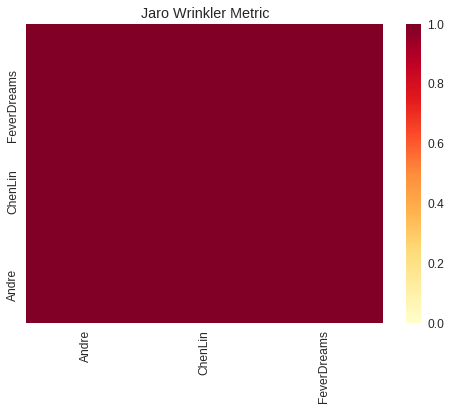

In [0]:
print(Similarities_jaro_winkler)    
sns.set(font_scale=1.2)
g = sns.heatmap(
    Similarities_jaro_winkler,
    vmin=0,
    vmax=1,
    cmap="YlOrRd")

g.set_xticklabels(writer, rotation=90)
g.set_yticklabels(writer, rotation=90)
g.set_title("Jaro Wrinkler Metric")


**Similarity of two strings**

[[1.         0.37967148 0.8535479 ]
 [0.37967148 1.         0.4076629 ]
 [0.8535479  0.4076629  1.        ]]


Text(0.5,1,'Ratio Metric')

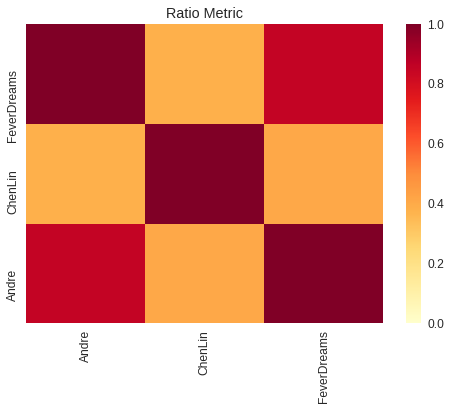

In [0]:
print(Similarities_ratio)    
sns.set(font_scale=1.2)
g = sns.heatmap(
    Similarities_ratio,
    vmin=0,
    vmax=1,
    cmap="YlOrRd")

g.set_xticklabels(writer, rotation=90)
g.set_yticklabels(writer, rotation=90)
g.set_title("Ratio Metric")